In [1]:
import pandas as pd
import numpy as np
import joblib

In [2]:
pd.set_option('display.float_format',lambda x: '{: .2f}'.format(x))
np.set_printoptions(suppress=True) 
pd.set_option("display.max_columns",None)
pd.set_option("display.width",2000) 

In [3]:
df = pd.read_csv('enhanced_disease_dataset.csv')
df.shape

(10000, 18)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      617
Symptom_5     1293
Symptom_6     1959
Symptom_7     2607
Symptom_8     3323
Symptom_9     3980
Symptom_10    4617
Symptom_11    5327
Symptom_12    6020
Symptom_13    6637
Symptom_14    7308
Symptom_15    7953
Symptom_16    8616
Symptom_17    9287
dtype: int64

In [6]:
df.Disease.value_counts()

Disease
Fungal Infection                        200
Acne Vulgaris                           200
Pneumonia                               200
Hemorrhoids                             200
Myocardial Infarction                   200
Varicose Veins                          200
Hypothyroidism                          200
Hyperthyroidism                         200
Hypoglycemia                            200
Osteoarthritis                          200
Rheumatoid Arthritis                    200
Benign Paroxysmal Positional Vertigo    200
Urinary Tract Infection                 200
Allergic Rhinitis                       200
Psoriasis                               200
Impetigo                                200
Lung Cancer                             200
Breast Cancer                           200
Colorectal Cancer                       200
Prostate Cancer                         200
Stomach Cancer                          200
Coronary Artery Disease                 200
COPD                    

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df = df.apply(lambda col: col.map(lambda x: x.lower() if isinstance(x, str) else x))

In [9]:
df.head()

,disease,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,symptom_8,symptom_9,symptom_10,symptom_11,symptom_12,symptom_13,symptom_14,symptom_15,symptom_16,symptom_17
0,fungal infection,dischromic_patches,nail_pitting,dysphagia,heart_palpitations,runny_nose,weakness,itching,skin_rash,fatigue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fungal infection,cold_intolerance,skin_rash,breathlessness,blisters,itching,visible_veins,scarring,joint_pain,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fungal infection,jaundice,coughing_blood,vomiting,nausea,itching,swollen_lymph_nodes,nodal_eruptions,skin_rash,cloudy_urine,disorientation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fungal infection,mood_swings,early_satiety,stiffness,numbness,nodal_eruptions,dysphagia,itching,skin_rash,joint_pain,breathlessness,dischromic_patches,bone_pain,NaN,NaN,NaN,NaN,NaN
4,fungal infection,high_blood_pressure,dysphagia,skin_rash,nausea,dischromic_patches,seizures,polydipsia,early_satiety,vomiting_blood,iron_deficiency_anemia,changes_in_urination,itching,balance_loss,sweating,NaN,NaN,NaN


In [10]:
(df.value_counts())

disease                  symptom_1            symptom_2         symptom_3        symptom_4                        symptom_5                symptom_6                symptom_7         symptom_8           symptom_9            symptom_10            symptom_11            symptom_12    symptom_13               symptom_14           symptom_15            symptom_16          symptom_17        
acne vulgaris            arm_pain             visual_aura       weight_loss      frequent_respiratory_infections  swelling                 heartburn                pimples           dysphagia           bone_pain            loss_of_appetite      dischromic_patches    oiliness      burning_urination        scarring             blood_in_stool        visible_veins       urinary_difficulty    1
jaundice                 wheezing             jaundice          visible_veins    dark_urine                       fatigue                  changes_in_bowel_habits  skin_dimpling     itching             night_sweats     

In [11]:
symptom_cols = [col for col in df.columns if col.startswith('symptom_')]

df['combined_symptoms'] = df[symptom_cols].apply(
    lambda row: ' '.join(sym.strip() for sym in row if pd.notnull(sym)),
    axis=1
)

In [12]:
df.drop([f'symptom_{i}' for i in range(1, 18)], axis=1, inplace=True)

In [13]:
(df['combined_symptoms'][1])

'cold_intolerance skin_rash breathlessness blisters itching visible_veins scarring joint_pain dischromic_patches'

In [14]:
df['symptom_count'] = df['combined_symptoms'].apply(lambda x: len(str(x).split()))

In [15]:
df[['disease','symptom_count']]

,disease,symptom_count
0,fungal infection,9
1,fungal infection,9
2,fungal infection,10
3,fungal infection,12
4,fungal infection,14
...,...,...
9995,alzheimers disease,12
9996,alzheimers disease,5
9997,alzheimers disease,8
9998,alzheimers disease,4


In [16]:
df = df[df['disease']!='hepatitis e']
df = df[df['disease']!='hepatitis c'] 
df = df[df['disease']!='hepatitis d']

C:\Users\SAKET\AppData\Local\Temp\ipykernel_7184\4268095567.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_47.values, y=top_47.index, palette="viridis")


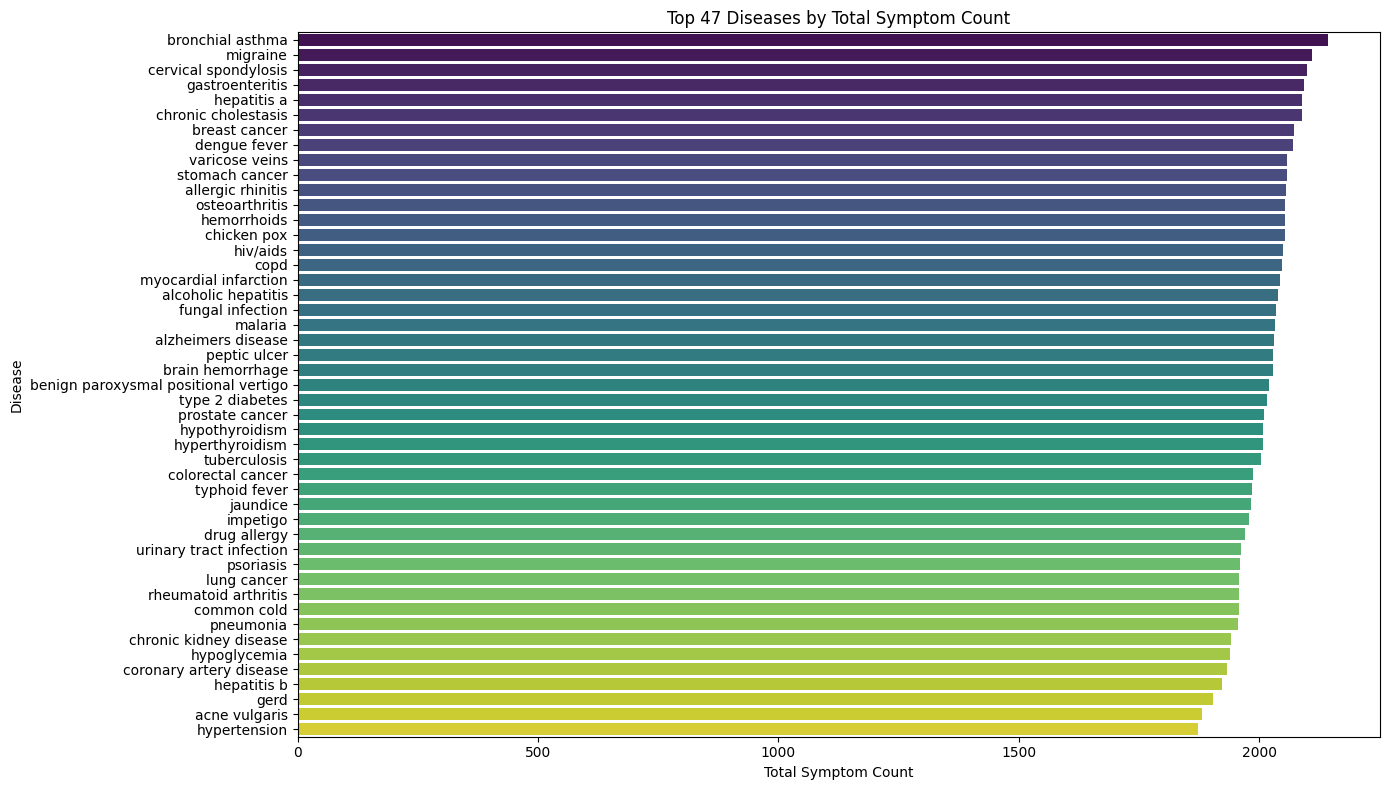

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

disease_symptom_sum = df.groupby('disease')['symptom_count'].sum()

top_47 = disease_symptom_sum.sort_values(ascending=False).head(50)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_47.values, y=top_47.index, palette="viridis")

plt.xlabel("Total Symptom Count")
plt.ylabel("Disease")
plt.title("Top 47 Diseases by Total Symptom Count")
plt.tight_layout()
plt.show()

In [18]:
df.head()

,disease,combined_symptoms,symptom_count
0,fungal infection,dischromic_patches nail_pitting dysphagia hear...,9
1,fungal infection,cold_intolerance skin_rash breathlessness blis...,9
2,fungal infection,jaundice coughing_blood vomiting nausea itchin...,10
3,fungal infection,mood_swings early_satiety stiffness numbness n...,12
4,fungal infection,high_blood_pressure dysphagia skin_rash nausea...,14


In [19]:

age_group_map = {
    'acne vulgaris': 1,
    'alcoholic hepatitis': 3,
    'allergic rhinitis': 0,
    'alzheimers disease': 4,
    'benign paroxysmal positional vertigo': 4,
    'brain hemorrhage': 4,
    'breast cancer': 4,
    'bronchial asthma': 0,
    'cervical spondylosis': 3,
    'chicken pox': 0,
    'chronic cholestasis': 3,
    'chronic kidney disease': 4,
    'colorectal cancer': 4,
    'common cold': 0,
    'copd': 4,
    'coronary artery disease': 4,
    'dengue fever': 0,
    'drug allergy': 0,
    'fungal infection': 0,
    'gastroenteritis': 0,
    'gerd': 3,
    'hemorrhoids': 3,
    'hepatitis a': 0,
    'hepatitis b': 2,
    'hiv/aids': 2,
    'hypertension': 3,
    'hyperthyroidism': 2,
    'hypoglycemia': 0,
    'hypothyroidism': 2,
    'impetigo': 0,
    'jaundice': 0,
    'lung cancer': 4,
    'malaria': 0,
    'migraine': 2,
    'myocardial infarction': 4,
    'osteoarthritis': 4,
    'peptic ulcer': 2,
    'pneumonia': 0,
    'prostate cancer': 4,
    'psoriasis': 2,
    'rheumatoid arthritis': 3,
    'stomach cancer': 4,
    'tuberculosis': 2,
    'type 2 diabetes': 3,
    'typhoid fever': 0,
    'urinary tract infection': 2,
    'varicose veins': 3
}

df['age_group'] = df['disease'].map(age_group_map)

age_group_labels = {
    0: "Children (0–14)",
    1: "Youth (15–29)",
    2: "Young Adults (30–44)",
    3: "Middle-aged Adults (45–59)",
    4: "Older Adults (60+)"
}

In [20]:
sex_map = {
    'acne vulgaris': 'both',
    'alcoholic hepatitis': 'male',
    'allergic rhinitis': 'both',
    'alzheimers disease': 'female',
    'benign paroxysmal positional vertigo': 'female',
    'brain hemorrhage': 'male',
    'breast cancer': 'female',
    'bronchial asthma': 'female',
    'cervical spondylosis': 'both',
    'chicken pox': 'both',
    'chronic cholestasis': 'female',
    'chronic kidney disease': 'male',
    'colorectal cancer': 'both',
    'common cold': 'both',
    'copd': 'male',
    'coronary artery disease': 'male',
    'dengue fever': 'both',
    'drug allergy': 'female',
    'fungal infection': 'both',
    'gastroenteritis': 'both',
    'gerd': 'both',
    'hemorrhoids': 'both',
    'hepatitis a': 'both',
    'hepatitis b': 'male',
    'hiv/aids': 'male',
    'hypertension': 'both',
    'hyperthyroidism': 'female',
    'hypoglycemia': 'both',
    'hypothyroidism': 'female',
    'impetigo': 'both',
    'jaundice': 'both',
    'lung cancer': 'male',
    'malaria': 'both',
    'migraine': 'female',
    'myocardial infarction': 'male',
    'osteoarthritis': 'female',
    'peptic ulcer': 'male',
    'pneumonia': 'both',
    'prostate cancer': 'male',
    'psoriasis': 'both',
    'rheumatoid arthritis': 'female',
    'stomach cancer': 'male',
    'tuberculosis': 'male',
    'type 2 diabetes': 'both',
    'typhoid fever': 'both',
    'urinary tract infection': 'female',
    'varicose veins': 'female'
}

df['sex'] = df['disease'].map(sex_map)

df.head()

,disease,combined_symptoms,symptom_count,age_group,sex
0,fungal infection,dischromic_patches nail_pitting dysphagia hear...,9,0,both
1,fungal infection,cold_intolerance skin_rash breathlessness blis...,9,0,both
2,fungal infection,jaundice coughing_blood vomiting nausea itchin...,10,0,both
3,fungal infection,mood_swings early_satiety stiffness numbness n...,12,0,both
4,fungal infection,high_blood_pressure dysphagia skin_rash nausea...,14,0,both


In [21]:
df=pd.get_dummies(df,columns=['sex'],drop_first=True,dtype=int)

In [22]:
df.head() 

,disease,combined_symptoms,symptom_count,age_group,sex_female,sex_male
0,fungal infection,dischromic_patches nail_pitting dysphagia hear...,9,0,0,0
1,fungal infection,cold_intolerance skin_rash breathlessness blis...,9,0,0,0
2,fungal infection,jaundice coughing_blood vomiting nausea itchin...,10,0,0,0
3,fungal infection,mood_swings early_satiety stiffness numbness n...,12,0,0,0
4,fungal infection,high_blood_pressure dysphagia skin_rash nausea...,14,0,0,0


In [23]:
# age_symptom_means = df.groupby('age_group')['symptom_count'].mean().to_dict()


# df['symptom_count_vs_age'] = df.apply(
#     lambda row: row['symptom_count'] / age_symptom_means[row['age_group']], 
#     axis=1
# )
# print(age_symptom_means)

In [24]:

for age in [0, 1, 2, 3, 4]:  
    df[f'symptoms_age{age}'] = (df['age_group'] == age) * df['symptom_count']

In [25]:
df['pediatric_fever'] = ((df['age_group'] == 0) & df['combined_symptoms'].str.contains('fever')).astype(int)

In [26]:
chronic_symptoms = ['fatigue', 'joint_pain', 'hypertension']
df['elderly_chronic'] = ((df['age_group'] == 4) & df['combined_symptoms'].str.contains('|'.join(chronic_symptoms))).astype(int)

In [27]:

df['age_symptom_count'] = df['age_group'] * df['symptom_count']

df['male_elderly'] = ((df['sex_male'] == 1) & (df['age_group'] == 4)).astype(int)

In [28]:
df.sample(65)

,disease,combined_symptoms,symptom_count,age_group,sex_female,sex_male,symptoms_age0,symptoms_age1,symptoms_age2,symptoms_age3,symptoms_age4,pediatric_fever,elderly_chronic,age_symptom_count,male_elderly
8468,breast cancer,confusion blood_in_stool breast_lump muscle_pa...,16,4,1,0,0,0,0,0,16,0,1,64,0
9702,chronic kidney disease,joint_pain fatigue cough reduced_mobility blee...,15,4,0,1,0,0,0,0,15,0,1,60,1
907,drug allergy,dehydration swelling hives itching nail_pittin...,8,0,1,0,8,0,0,0,0,0,0,0,0
6102,varicose veins,cough leg_pain visible_veins swelling cramps f...,6,3,1,0,0,0,0,6,0,0,0,18,0
5973,myocardial infarction,dizziness sweating chest_pain photophobia indi...,8,4,0,1,0,0,0,0,8,0,0,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,typhoid fever,constipation fever diarrhea abdominal_pain,4,0,0,0,4,0,0,0,0,1,0,0,0
8066,impetigo,blisters crusting nasal_congestion chest_pain ...,7,0,0,0,7,0,0,0,0,0,0,0,0
5925,myocardial infarction,blood_in_semen weakness dizziness cloudy_urine...,17,4,0,1,0,0,0,0,17,0,0,68,1
8020,impetigo,dysphagia skin_rash muscle_pain coughing_blood...,13,0,0,0,13,0,0,0,0,1,0,0,0


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features= 15000)

In [30]:
df.columns

Index(['disease', 'combined_symptoms', 'symptom_count', 'age_group', 'sex_female', 'sex_male', 'symptoms_age0', 'symptoms_age1', 'symptoms_age2', 'symptoms_age3', 'symptoms_age4', 'pediatric_fever', 'elderly_chronic', 'age_symptom_count', 'male_elderly'], dtype='object')

In [31]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df, test_size=0.25, stratify=df['disease'], random_state=42
)

In [32]:
age_symptom_means = df_train.groupby('age_group')['symptom_count'].mean().to_dict()

df_train['symptom_count_vs_age'] = df_train.apply(
    lambda row: row['symptom_count'] / age_symptom_means[row['age_group']], 
    axis=1
)
df_test['symptom_count_vs_age'] = df_test.apply(
    lambda row: row['symptom_count'] / age_symptom_means[row['age_group']], 
    axis=1
)
print(age_symptom_means)

{0: 10.041777777777778, 1: 9.686666666666667, 2: 10.108148148148148, 3: 10.113333333333333, 4: 10.042051282051283}


In [33]:
df_train.head()

,disease,combined_symptoms,symptom_count,age_group,sex_female,sex_male,symptoms_age0,symptoms_age1,symptoms_age2,symptoms_age3,symptoms_age4,pediatric_fever,elderly_chronic,age_symptom_count,male_elderly,symptom_count_vs_age
1283,hiv/aids,weight_loss fatigue dizziness fever swollen_ly...,5,2,0,1,0,0,5,0,0,0,0,10,0,0.49
116,fungal infection,phonophobia headache itching dischromic_patche...,7,0,0,0,7,0,0,0,0,0,0,0,0,0.70
1101,peptic ulcer,fever abdominal_pain black_stools joint_pain l...,13,2,0,1,0,0,13,0,0,0,0,26,0,1.29
3110,malaria,bloating skin_rash headache hives weakness con...,12,0,0,0,12,0,0,0,0,1,0,0,0,1.20
9547,copd,wheezing vomiting frequent_respiratory_infecti...,8,4,0,1,0,0,0,0,8,0,0,32,1,0.80


In [34]:
X_train = df_train[['combined_symptoms','symptom_count','age_group','sex_female','sex_male','symptom_count_vs_age','symptoms_age0', 'symptoms_age1', 'symptoms_age2', 'symptoms_age3', 'symptoms_age4', 'pediatric_fever', 'elderly_chronic', 'age_symptom_count', 'male_elderly']]
X_test = df_test[['combined_symptoms','symptom_count','age_group','sex_female','sex_male','symptom_count_vs_age','symptoms_age0', 'symptoms_age1', 'symptoms_age2', 'symptoms_age3', 'symptoms_age4', 'pediatric_fever', 'elderly_chronic', 'age_symptom_count', 'male_elderly']]

y_train = df_train['disease']
y_test = df_test['disease']

In [35]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(df_train['disease'])
# y_test = le.transform(df_test['disease'])

In [36]:

X_train_tfidf = tfidf.fit_transform(X_train['combined_symptoms']).toarray()
X_test_tfidf = tfidf.transform(X_test['combined_symptoms']).toarray()

feature_cols = ['symptom_count','age_group','sex_female','sex_male','symptom_count_vs_age','symptoms_age0', 'symptoms_age1', 'symptoms_age2', 'symptoms_age3', 'symptoms_age4', 'pediatric_fever', 'elderly_chronic', 'age_symptom_count', 'male_elderly']

X_train_extra = np.hstack([X_train[col].values.reshape(-1, 1) for col in feature_cols])
X_test_extra = np.hstack([X_test[col].values.reshape(-1, 1) for col in feature_cols])

X_train_final = np.hstack([X_train_tfidf, X_train_extra])
X_test_final = np.hstack([X_test_tfidf, X_test_extra])

In [37]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# mnb = MultinomialNB()

# mnb.fit(X_train_final, y_train)

# y_pred_mnb = mnb.predict(X_test_final)

# print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_mnb))

In [38]:
bnb = BernoulliNB(
  alpha=4.597860443322474, binarize= 0.013281129324213166, class_prior= None
)

bnb.fit(X_train_final, y_train)

y_pred_bnb = bnb.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bnb))

Accuracy: 0.9676595744680851

Classification Report:
                                       precision    recall  f1-score   support

                       acne vulgaris       1.00      1.00      1.00        50
                 alcoholic hepatitis       1.00      1.00      1.00        50
                   allergic rhinitis       0.88      0.90      0.89        50
                  alzheimers disease       1.00      1.00      1.00        50
benign paroxysmal positional vertigo       1.00      1.00      1.00        50
                    brain hemorrhage       0.94      1.00      0.97        50
                       breast cancer       1.00      1.00      1.00        50
                    bronchial asthma       1.00      0.98      0.99        50
                cervical spondylosis       0.98      1.00      0.99        50
                         chicken pox       0.86      0.86      0.86        50
                 chronic cholestasis       1.00      0.98      0.99        50
         

In [39]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

def add_custom_features(age, sex, symptom1, symptom2, symptom3,symptom4=None, symptom5=None, symptom6=None, symptom7=None, symptom8=None,symptom9=None, symptom10=None, symptom11=None, symptom12=None,symptom13=None, symptom14=None, symptom15=None, symptom16=None, symptom17=None):

    def get_age_group(age):
        if age <= 14:
            return 0
        elif age <= 29:
            return 1
        elif age <= 44:
            return 2
        elif age <= 59:
            return 3
        else:
            return 4
    age_group = get_age_group(age)

    sex = str(sex).strip().lower()
    sex_male = 1 if sex == 'male' else 0
    sex_female = 1 if sex == 'female' else 0

    symptoms = [
        symptom1, symptom2, symptom3, symptom4, symptom5, symptom6, symptom7, symptom8,
        symptom9, symptom10, symptom11, symptom12, symptom13, symptom14, symptom15, symptom16, symptom17
    ]
    cleaned_symptoms = [s.strip().lower() for s in symptoms if s]
    combined_symptoms = ' '.join(cleaned_symptoms)

    symptom_count = len(cleaned_symptoms)

    temp_symptoms_for_checking = combined_symptoms.replace('_', ' ')

    pediatric_fever = int(age_group == 0 and 'fever' in temp_symptoms_for_checking)

    chronic_symptoms = ['fatigue', 'joint pain', 'hypertension']
    elderly_chronic = int(
        age_group == 4 and any(symptom in temp_symptoms_for_checking for symptom in chronic_symptoms)
    )

    age_symptom_count = age_group * symptom_count

    male_elderly = int(sex_male == 1 and age_group == 4)

    age_symptom_means={0: 10.041777777777778, 1: 9.686666666666667, 2: 10.108148148148148, 3: 10.113333333333333, 4: 10.042051282051283}
    symptom_count_vs_age = symptom_count / age_symptom_means[age_group]

    symptoms_age0 = symptom_count if age_group == 0 else 0
    symptoms_age1 = symptom_count if age_group == 1 else 0
    symptoms_age2 = symptom_count if age_group == 2 else 0
    symptoms_age3 = symptom_count if age_group == 3 else 0
    symptoms_age4 = symptom_count if age_group == 4 else 0


    return {
        'age_group': age_group,
        'sex_male': sex_male,
        'sex_female': sex_female,
        'combined_symptoms': combined_symptoms,
        'symptom_count': symptom_count,
        'pediatric_fever': pediatric_fever,
        'elderly_chronic': elderly_chronic,
        'age_symptom_count':age_symptom_count,
        'male_elderly':male_elderly,
        'symptom_count_vs_age':symptom_count_vs_age,
        'symptoms_age0': symptoms_age0,
        'symptoms_age1': symptoms_age1,
        'symptoms_age2': symptoms_age2,
        'symptoms_age3': symptoms_age3,
        'symptoms_age4': symptoms_age4
    }

print(add_custom_features(23,'male','cough','abc_ss','add_s','asd_rf'))

    

{'age_group': 1, 'sex_male': 1, 'sex_female': 0, 'combined_symptoms': 'cough abc_ss add_s asd_rf', 'symptom_count': 4, 'pediatric_fever': 0, 'elderly_chronic': 0, 'age_symptom_count': 4, 'male_elderly': 0, 'symptom_count_vs_age': 0.4129387474191328, 'symptoms_age0': 0, 'symptoms_age1': 4, 'symptoms_age2': 0, 'symptoms_age3': 0, 'symptoms_age4': 0}


In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class CustomFeatureTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        feature_list = []
        for _, row in X.iterrows():
            result = add_custom_features(
                row['age'], row['sex'], row['symptom1'], row['symptom2'], row['symptom3'],
                row.get('symptom4'), row.get('symptom5'), row.get('symptom6'),
                row.get('symptom7'), row.get('symptom8'), row.get('symptom9'),
                row.get('symptom10'), row.get('symptom11'), row.get('symptom12'),
                row.get('symptom13'), row.get('symptom14'), row.get('symptom15'),
                row.get('symptom16'), row.get('symptom17')
            )
            feature_list.append(result)
        return pd.DataFrame(feature_list)

class FeatureMerger(BaseEstimator, TransformerMixin):
    def __init__(self, tfidf_vectorizer, feature_cols):
        self.tfidf_vectorizer = tfidf_vectorizer
        self.feature_cols = feature_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        tfidf_feats = self.tfidf_vectorizer.transform(X['combined_symptoms']).toarray()
        extra_feats = np.hstack([X[col].values.reshape(-1, 1) for col in self.feature_cols])
        return np.hstack([tfidf_feats, extra_feats])

feature_cols = [
    'symptom_count','age_group','sex_female','sex_male','symptom_count_vs_age',
    'symptoms_age0', 'symptoms_age1', 'symptoms_age2', 'symptoms_age3', 'symptoms_age4',
    'pediatric_fever', 'elderly_chronic', 'age_symptom_count', 'male_elderly'
]

pipeline = Pipeline([
    ('feature_engineering', CustomFeatureTransformer()),
    ('feature_merging', FeatureMerger(tfidf_vectorizer=tfidf, feature_cols=feature_cols)),
    ('model', bnb)
])


In [46]:
joblib.dump(bnb,'model.joblib')
joblib.dump(tfidf,'tfidf.joblib')

['tfidf.joblib']

In [41]:
df_test.sample(5,random_state=42)

,disease,combined_symptoms,symptom_count,age_group,sex_female,sex_male,symptoms_age0,symptoms_age1,symptoms_age2,symptoms_age3,symptoms_age4,pediatric_fever,elderly_chronic,age_symptom_count,male_elderly,symptom_count_vs_age
9635,chronic kidney disease,scarring reduced_mobility tremors neck_pain he...,14,4,0,1,0,0,0,0,14,0,1,56,1,1.39
664,chronic cholestasis,creaking_joints skin_rash dark_urine swelling_...,11,3,1,0,0,0,0,11,0,0,0,33,0,1.09
1557,type 2 diabetes,confusion chronic_cough breast_lump polydipsia...,8,3,0,0,0,0,0,8,0,0,0,24,0,0.79
1050,peptic ulcer,abdominal_pain cold_intolerance blood_in_semen...,15,2,0,1,0,0,15,0,0,0,0,30,0,1.48
9182,stomach cancer,vomiting_blood indigestion changes_in_bowel_ha...,9,4,0,1,0,0,0,0,9,0,0,36,1,0.90


In [42]:
sample_input = pd.DataFrame([{
    'age': 22,
    'sex': 'female',
    'symptom1': 'headache',
    'symptom2': 'vomiting',
    'symptom3': 'stiff_neck',
    'symptom4': 'nausea',
    'symptom5': 'fever',
    'symptom6': 'photophobia',
    'symptom7': 'confusion',
    'symptom8': None,
    'symptom9': None,
    'symptom10': None,
    'symptom11': None,
    'symptom12': None,
    'symptom13': None,
    'symptom14': None,
    'symptom15': None,
    'symptom16': None,
    'symptom17': None
}])

predicted_disease = pipeline.predict(sample_input)
print(predicted_disease)

['migraine']


In [43]:

features = add_custom_features(
    age=22,
    sex='female',
    symptom1='headache',
    symptom2='vomiting',
    symptom3='stiff_neck',
    symptom4='nausea',
    symptom5='fever',
    symptom6='photophobia',
    symptom7='confusion'
)

df_features = pd.DataFrame([features])

tfidf_feat = tfidf.transform(df_features['combined_symptoms']).toarray()

extra_feats = np.hstack([df_features[col].values.reshape(-1, 1) for col in feature_cols])

final_input = np.hstack([tfidf_feat, extra_feats])

prediction_manual = bnb.predict(final_input)
print("Manual Prediction:", prediction_manual)


Manual Prediction: ['migraine']


In [44]:
import joblib

joblib.dump(pipeline, 'diagnosis_pipeline.joblib')


['diagnosis_pipeline.joblib']

In [45]:

disease_advice = {
    'fungal infection': [
        'Keep skin dry and clean',
        'Avoid sharing personal items',
        'Use antifungal treatments',
        'Wear breathable fabrics',
        'Monitor for recurrence'
    ],
    'allergic rhinitis': [
        'Avoid allergens',
        'Use nasal saline rinses',
        'Take antihistamines',
        'Keep indoor air clean',
        'Consult an allergist'
    ],
    'gerd': [
        'Avoid trigger foods',
        'Eat smaller meals',
        'Elevate head during sleep',
        'Maintain healthy weight',
        'Avoid lying down after eating'
    ],
    'chronic cholestasis': [
        'Follow low-fat diet',
        'Take prescribed medications',
        'Avoid alcohol',
        'Monitor for complications',
        'Stay hydrated'
    ],
    'drug allergy': [
        'Know your allergies',
        'Wear medical alert bracelet',
        'Avoid self-medication',
        'Report reactions immediately',
        'Consider allergy testing'
    ],
    'peptic ulcer': [
        'Avoid NSAIDs',
        'Eradicate H. pylori',
        'Reduce stress',
        'Avoid trigger foods',
        'Take medications as prescribed'
    ],
    'hiv/aids': [
        'Adhere to antiretroviral therapy',
        'Practice safe sex',
        'Get regular checkups',
        'Avoid risky behaviors',
        'Stay vaccinated'
    ],
    'type 2 diabetes': [
        'Monitor blood sugar',
        'Follow balanced diet',
        'Exercise regularly',
        'Maintain healthy weight',
        'Take medications as prescribed'
    ],
    'gastroenteritis': [
        'Stay hydrated',
        'Practice hand hygiene',
        'Avoid contaminated food/water',
        'Rest adequately',
        'Seek medical help if severe'
    ],
    'bronchial asthma': [
        'Use inhalers as prescribed',
        'Avoid asthma triggers',
        'Monitor peak flow',
        'Get flu/pneumonia vaccines',
        'Develop an asthma action plan'
    ],
    'hypertension': [
        'Reduce salt intake',
        'Exercise regularly',
        'Monitor blood pressure',
        'Avoid smoking/alcohol',
        'Manage stress'
    ],
    'migraine': [
        'Identify/avoid triggers',
        'Maintain sleep schedule',
        'Stay hydrated',
        'Use prescribed medications',
        'Practice relaxation techniques'
    ],
    'cervical spondylosis': [
        'Maintain good posture',
        'Perform neck exercises',
        'Avoid heavy lifting',
        'Use ergonomic furniture',
        'Seek physiotherapy'
    ],
    'brain hemorrhage': [
        'Control blood pressure',
        'Avoid smoking/alcohol',
        'Wear helmets during activities',
        'Manage stress',
        'Seek immediate medical help for symptoms'
    ],
    'jaundice': [
        'Avoid alcohol',
        'Stay hydrated',
        'Follow low-fat diet',
        'Get vaccinated for hepatitis',
        'Monitor liver function'
    ],
    'malaria': [
        'Use mosquito nets',
        'Apply insect repellent',
        'Take antimalarial prophylaxis',
        'Eliminate standing water',
        'Seek prompt treatment'
    ],
    'chicken pox': [
        'Get vaccinated',
        'Avoid scratching lesions',
        'Practice good hygiene',
        'Isolate to prevent spread',
        'Use soothing lotions'
    ],
    'dengue fever': [
        'Use mosquito repellent',
        'Wear long clothing',
        'Eliminate breeding sites',
        'Stay hydrated',
        'Seek medical care for fever'
    ],
    'typhoid fever': [
        'Get vaccinated',
        'Drink safe water',
        'Wash hands frequently',
        'Avoid raw foods',
        'Complete antibiotic course'
    ],
    'hepatitis a': [
        'Get vaccinated',
        'Practice hand hygiene',
        'Drink safe water',
        'Avoid raw shellfish',
        'Monitor liver health'
    ],
    'hepatitis b': [
        'Get vaccinated',
        'Practice safe sex',
        'Avoid sharing needles',
        'Screen regularly',
        'Follow antiviral therapy'
    ],
    'alcoholic hepatitis': [
        'Stop alcohol consumption',
        'Follow low-fat diet',
        'Take prescribed medications',
        'Monitor liver function',
        'Seek support for alcoholism'
    ],
    'tuberculosis': [
        'Complete antibiotic course',
        'Cover mouth when coughing',
        'Ensure good ventilation',
        'Get screened if exposed',
        'Maintain nutrition'
    ],
    'common cold': [
        'Wash hands frequently',
        'Avoid close contact',
        'Stay hydrated',
        'Rest adequately',
        'Use symptom relief medications'
    ],
    'pneumonia': [
        'Get vaccinated',
        'Avoid smoking',
        'Practice hand hygiene',
        'Seek prompt treatment',
        'Maintain nutrition'
    ],
    'hemorrhoids': [
        'Eat high-fiber diet',
        'Stay hydrated',
        'Avoid straining during bowel movements',
        'Use topical treatments',
        'Exercise regularly'
    ],
    'myocardial infarction': [
        'Control cholesterol',
        'Exercise regularly',
        'Avoid smoking',
        'Monitor blood pressure',
        'Take aspirin if prescribed'
    ],
    'varicose veins': [
        'Exercise regularly',
        'Avoid prolonged standing',
        'Wear compression stockings',
        'Maintain healthy weight',
        'Elevate legs'
    ],
    'hypothyroidism': [
        'Take thyroid medication',
        'Monitor thyroid levels',
        'Eat iodine-rich foods',
        'Avoid goitrogenic foods',
        'Exercise regularly'
    ],
    'hyperthyroidism': [
        'Follow medication regimen',
        'Monitor thyroid function',
        'Avoid excess iodine',
        'Manage stress',
        'Eat balanced diet'
    ],
    'hypoglycemia': [
        'Eat regular meals',
        'Monitor blood sugar',
        'Carry glucose tablets',
        'Avoid excessive alcohol',
        'Exercise with snacks'
    ],
    'osteoarthritis': [
        'Maintain healthy weight',
        'Exercise regularly',
        'Use joint supports',
        'Take pain relievers as prescribed',
        'Seek physiotherapy'
    ],
    'rheumatoid arthritis': [
        'Take prescribed medications',
        'Exercise regularly',
        'Rest during flares',
        'Eat anti-inflammatory diet',
        'Monitor joint health'
    ],
    'benign paroxysmal positional vertigo': [
        'Perform Epley maneuver',
        'Avoid sudden head movements',
        'Stay hydrated',
        'Use caution when standing',
        'Consult a specialist'
    ],
    'acne vulgaris': [
        'Wash face gently',
        'Avoid touching face',
        'Use non-comedogenic products',
        'Follow prescribed treatments',
        'Eat balanced diet'
    ],
    'urinary tract infection': [
        'Drink plenty of water',
        'Urinate frequently',
        'Practice good hygiene',
        'Avoid irritants (e.g., caffeine)',
        'Seek antibiotics if needed'
    ],
    'psoriasis': [
        'Moisturize skin regularly',
        'Avoid triggers (e.g., stress)',
        'Use prescribed treatments',
        'Get moderate sunlight',
        'Monitor for joint pain'
    ],
    'impetigo': [
        'Keep skin clean',
        'Avoid scratching',
        'Use prescribed antibiotics',
        'Wash bedding/towels',
        'Isolate to prevent spread'
    ],
    'lung cancer': [
        'Avoid smoking/secondhand smoke',
        'Get screened if high-risk',
        'Maintain healthy diet',
        'Exercise regularly',
        'Monitor respiratory symptoms'
    ],
    'breast cancer': [
        'Perform regular self-exams',
        'Get mammograms as recommended',
        'Maintain healthy weight',
        'Limit alcohol',
        'Exercise regularly'
    ],
    'colorectal cancer': [
        'Get regular screenings',
        'Eat high-fiber diet',
        'Limit red/processed meats',
        'Exercise regularly',
        'Avoid smoking'
    ],
    'prostate cancer': [
        'Get PSA screenings',
        'Eat healthy diet',
        'Exercise regularly',
        'Limit fatty foods',
        'Monitor urinary symptoms'
    ],
    'stomach cancer': [
        'Eat high-fiber diet',
        'Limit salty/smoked foods',
        'Avoid smoking/alcohol',
        'Get screened if high-risk',
        'Monitor digestive symptoms'
    ],
    'coronary artery disease': [
        'Control cholesterol',
        'Exercise regularly',
        'Avoid smoking',
        'Monitor blood pressure',
        'Eat heart-healthy diet'
    ],
    'copd': [
        'Quit smoking',
        'Use inhalers as prescribed',
        'Get vaccinated',
        'Avoid air pollutants',
        'Perform breathing exercises'
    ],
    'chronic kidney disease': [
        'Control blood pressure',
        'Monitor blood sugar',
        'Follow low-sodium diet',
        'Stay hydrated',
        'Avoid NSAIDs'
    ],
    'alzheimers disease': [
        'Engage in mental exercises',
        'Exercise regularly',
        'Eat Mediterranean diet',
        'Maintain social connections',
        'Monitor memory changes'
    ]
}


disease_map = {
    'lung cancer': (10, True, ['Pembrolizumab', 'Cisplatin', 'Carboplatin', 'Paclitaxel']),  
    'myocardial infarction': (10, True, ['Aspirin', 'Clopidogrel', 'Metoprolol', 'Atorvastatin']), 
    'brain hemorrhage': (10, True, ['Mannitol', 'Nimodipine', 'Phenytoin', 'Levetiracetam']), 
    'breast cancer': (9, True, ['Tamoxifen', 'Trastuzumab', 'Doxorubicin', 'Cyclophosphamide']),  
    'colorectal cancer': (9, True, ['Fluorouracil', 'Oxaliplatin', 'Cetuximab', 'Leucovorin']),  
    'prostate cancer': (9, True, ['Leuprolide', 'Bicalutamide', 'Abiraterone', 'Docetaxel']),  
    'stomach cancer': (9, True, ['Fluorouracil', 'Cisplatin', 'Trastuzumab', 'Capecitabine']), 
    'coronary artery disease': (9, True, ['Atorvastatin', 'Aspirin', 'Metoprolol', 'Nitroglycerin']),  
    'hiv/aids': (8, False, ['Tenofovir', 'Emtricitabine', 'Dolutegravir', 'Efavirenz']),  
    'tuberculosis': (8, False, ['Isoniazid', 'Rifampin', 'Pyrazinamide', 'Ethambutol']),  
    'pneumonia': (8, False, ['Amoxicillin', 'Azithromycin', 'Levofloxacin', 'Doxycycline']),  
    'copd': (8, False, ['Tiotropium', 'Salmeterol', 'Ipratropium', 'Budesonide']),  
    'chronic kidney disease': (8, True, ['Losartan', 'Furosemide', 'Erythropoietin', 'Sevelamer']),  
    'hepatitis b': (7, False, ['Tenofovir', 'Entecavir', 'Lamivudine', 'Peginterferon Alfa']),          
    'alcoholic hepatitis': (7, False, ['Prednisolone', 'Pentoxifylline', 'N-Acetylcysteine', 'N/A']), 
    'malaria': (7, False, ['Artemether-Lumefantrine', 'Chloroquine', 'Quinine', 'Doxycycline']),  
    'dengue fever': (7, False, ['Acetaminophen', 'N/A', 'N/A', 'N/A']),  
    'typhoid fever': (7, False, ['Ceftriaxone', 'Azithromycin', 'Ciprofloxacin', 'N/A']),  
    'alzheimers disease': (7, False, ['Donepezil', 'Memantine', 'Rivastigmine', 'Galantamine']),  
    'type 2 diabetes': (6, False, ['Metformin', 'Sitagliptin', 'Insulin Glargine', 'Empagliflozin']), 
    'hypertension': (6, False, ['Lisinopril', 'Amlodipine', 'Hydrochlorothiazide', 'Losartan']), 
    'bronchial asthma': (6, False, ['Albuterol', 'Budesonide', 'Montelukast', 'Fluticasone']),  
    'rheumatoid arthritis': (6, True, ['Methotrexate', 'Adalimumab', 'Hydroxychloroquine', 'Leflunomide']),  
    'gastroenteritis': (5, False, ['Loperamide', 'Ondansetron', 'Ciprofloxacin', 'N/A']), 
    'peptic ulcer': (5, True, ['Omeprazole', 'Amoxicillin', 'Clarithromycin', 'Ranitidine']),  
    'hepatitis a': (5, False, ['Supportive Care', 'N/A', 'N/A', 'N/A']), 
    'hypoglycemia': (5, False, ['Glucose Tablets', 'Glucagon', 'Dextrose', 'N/A']),
    'chronic cholestasis': (5, True, ['Ursodeoxycholic Acid', 'Cholestyramine', 'Rifampin', 'N/A']),  
    'osteoarthritis': (4, True, ['Acetaminophen', 'Ibuprofen', 'Duloxetine', 'Hyaluronic Acid']), 
    'hypothyroidism': (4, False, ['Levothyroxine', 'Liothyronine', 'N/A', 'N/A']),  
    'hyperthyroidism': (4, True, ['Methimazole', 'Propylthiouracil', 'Carbimazole', 'N/A']),   
    'psoriasis': (4, False, ['Calcipotriene', 'Betamethasone', 'Methotrexate', 'Adalimumab']),  
    'urinary tract infection': (4, False, ['Nitrofurantoin', 'Trimethoprim-Sulfamethoxazole', 'Fosfomycin', 'Ciprofloxacin']),  
    'jaundice': (4, False, ['Ursodeoxycholic Acid', 'Phenobarbital', 'N/A', 'N/A']),  
    'cervical spondylosis': (3, True, ['Ibuprofen', 'Acetaminophen', 'Cyclobenzaprine', 'N/A']),  
    'varicose veins': (3, True, ['Diosmin', 'N/A', 'N/A', 'N/A']),  
    'migraine': (3, False, ['Sumatriptan', 'Propranolol', 'Topiramate', 'Ibuprofen']),  
    'benign paroxysmal positional vertigo': (3, False, ['Meclizine', 'Dimenhydrinate', 'Betahistine', 'N/A']),
    'drug allergy': (3, False, ['Epinephrine', 'Diphenhydramine', 'Prednisone', 'N/A']),
    'gerd': (3, False, ['Omeprazole', 'Ranitidine', 'Antacids', 'Domperidone']),
    'chicken pox': (2, False, ['Acyclovir', 'Calamine', 'Diphenhydramine', 'N/A']),  
    'hemorrhoids': (2, True, ['Hydrocortisone', 'Lidocaine', 'Witch Hazel', 'N/A']), 
    'impetigo': (2, False, ['Mupirocin', 'Fusidic Acid', 'Cephalexin', 'N/A']),  
    'allergic rhinitis': (1, False, ['Loratadine', 'Cetirizine', 'Fluticasone', 'N/A']), 
    'common cold': (1, False, ['Pseudoephedrine', 'Dextromethorphan', 'Guaifenesin', 'N/A']),  
    'acne vulgaris': (1, False, ['Benzoyl Peroxide', 'Clindamycin', 'Tretinoin', 'Adapalene']),  
    'fungal infection': (1, False, ['Clotrimazole', 'Fluconazole', 'Terbinafine', 'N/A'])  
}


def get_disease_info(disease):
    
    result = {
        'precautions': [],
        'risk_score': None,
        'requires_surgery': None,
        'drugs': []
    }
    
    if disease in disease_advice:
        result['precautions'] = disease_advice[disease]
        
    if disease in disease_map:
        risk_score, requires_surgery, drugs = disease_map[disease]
        result['risk_score'] = risk_score
        result['requires_surgery'] = requires_surgery
        result['drugs'] = drugs
    
    return result

print(get_disease_info(predicted_disease[0]))

{'precautions': ['Identify/avoid triggers', 'Maintain sleep schedule', 'Stay hydrated', 'Use prescribed medications', 'Practice relaxation techniques'], 'risk_score': 3, 'requires_surgery': False, 'drugs': ['Sumatriptan', 'Propranolol', 'Topiramate', 'Ibuprofen']}
